<a href="https://colab.research.google.com/github/p25-c4/car/blob/main/0308_car_project_ji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# Load the Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/포스코/car_used.csv")
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi


In [4]:
df['Engine'] = pd.to_numeric(df['Engine'].replace(' CC', "", regex=True),errors = 'coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'].replace(' kmpl', "", regex=True),errors = 'coerce')
df['Power'] = pd.to_numeric(df['Power'].replace(' bhp', "", regex=True),errors = 'coerce')
df['Brand'] = df['Name'].str.split().str[0]
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi


In [5]:
df.to_csv("car_used.csv", index=False)

# EDA & Preprocessing

- 데이터 전처리 항목
    1. Owner_Type: 숫자형으로 변환, 4 이상은 4로 처리(O)
        - 4 이상인 자료가 12개 밖에 되지 않아 4로 처리함
    2. Brand: 국가(대륙) 별로 feature 추가 (O)
        - Brand별 가격 차이가 있을 것으로 생각해 Brand feature 추가
        - 비슷한 국가, 대륙의 Brand 가격이 비슷할 것으로 생각하여 국가(대륙)별로 묶으려 하였으나, 데이터를 살펴본 결과 그렇지 않아서 그룹화 기준 변경
        -
    3. Location --> 아직 안 함
    4. Year --> 연식(age) (O)
        - Year 별 Price 산점도를 확인한 결과, 오래된 차 일수록 가격이 낮은 경향이 있음.
        - Price가 비슷한 시기에 측정된 것으로 추측됨.
        - 따라서 회귀분석에 적절한 'age' feature를 추가함.
    5. 이상치 --> Price로 찾아서 개별적 제거여부 결정


## Owner_Type 처리

In [6]:
df[df['Owner_Type']=='Fourth & Above']

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,6131.84,2007,262000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,7.0,NaN,Toyota
885,Maruti Grand Vitara AT,Chennai,8431.28,2008,77000,Petrol,Automatic,Fourth & Above,9.7,1995.0,163.50,5.0,NaN,Maruti
1081,Hyundai i20 1.2 Sportz Option,Bangalore,4982.12,2010,61000,Petrol,Manual,Fourth & Above,17.0,1197.0,80.00,5.0,NaN,Hyundai
1699,Ford Endeavour 4x2 XLT Limited Edition,Pune,4598.88,2007,90000,Diesel,Manual,Fourth & Above,10.9,2499.0,143.00,7.0,NaN,Ford
2988,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,7818.10,2005,240000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,8.0,NaN,Toyota
3368,Maruti Swift Ldi BSIII,Pune,3295.86,2009,80000,Diesel,Manual,Fourth & Above,17.8,1248.0,75.00,5.0,NaN,Maruti
3404,Maruti Swift 1.3 VXi,Jaipur,3602.46,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,NaN,Maruti
4148,Ford Ikon 1.3 Flair,Coimbatore,3019.93,2008,59833,Petrol,Manual,Fourth & Above,13.8,1299.0,70.00,5.0,NaN,Ford
5647,Toyota Qualis Fleet A3,Mumbai,3372.51,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,Toyota
6226,Maruti Omni E 8 Str STD,Bangalore,NaN,2005,81245,Petrol,Manual,Fourth & Above,16.8,796.0,34.20,8.0,NaN,Maruti


In [7]:
# Owner_Type 숫자형으로
df.loc[df["Owner_Type"]=="First", "Owner_Type_id"] = 1
df.loc[df["Owner_Type"]=="Second", "Owner_Type_id"] = 2
df.loc[df["Owner_Type"]=="Third", "Owner_Type_id"] = 3
df.loc[df["Owner_Type"]=="Fourth & Above", "Owner_Type_id"] = 4
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti,1.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai,1.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda,1.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti,1.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi,2.0


## Brand 관련 변수 생성

In [8]:
df.groupby(["Brand"])["Price"].describe().sort_values(by="50%", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Lamborghini,1.0,183955.200000,NaN,183955.20,183955.2000,183955.200,183955.2000,183955.20
Porsche,18.0,74116.061111,30096.092377,3096.58,62433.6275,72079.780,96940.5575,114972.00
Land,60.0,60183.243000,37014.510316,16862.56,33000.7975,53653.600,72608.6475,245273.60
Jaguar,43.0,59961.551628,28201.301675,24527.36,40830.3900,50281.090,73321.4750,153296.00
Bentley,2.0,48096.620000,59889.144224,5748.60,26922.6100,48096.620,69270.6300,90444.64
Mini,29.0,43103.134828,10758.015072,26060.32,33725.1200,38324.000,53653.6000,68354.69
Mercedes-Benz,325.0,42135.740369,25972.143599,1624.94,22227.9200,37557.520,55186.5600,141047.65
Audi,241.0,40017.252863,19747.788417,11497.20,26826.8000,36407.800,49851.8600,111814.10
BMW,273.0,39660.763590,24476.634075,2422.08,21384.7900,32698.040,50587.6800,143592.36


In [9]:
# Brand_Country feature 추가
india_car = ["Ambassador", "Force", "Hindustan", "Mahindra", "Maruti", "Tata"]
eu_car = ["Audi", "BMW", "Bentley", "Fiat", "Jaguar", "Lamborghini", "Land", "Mercedes-Benz",
          "Mini", "OpelCorsa", "Porsche", "Renault", "Skoda", 'Smart', 'Volkswagen','Volvo' ]
us_car = ['Chevrolet', 'Ford', 'Jeep']
jp_car = ["Datsun", "Honda","ISUZU", "Mitsubishi","Nissan","Toyota"]
kr_car = ['Hyundai']

df.loc[df["Brand"].isin(india_car),"Brand_Country"] = "India"
df.loc[df["Brand"].isin(eu_car),"Brand_Country"] = "Europe"
df.loc[df["Brand"].isin(us_car),"Brand_Country"] = "US"
df.loc[df["Brand"].isin(jp_car),"Brand_Country"] = "Japan"
df.loc[df["Brand"].isin(kr_car),"Brand_Country"] = "Korea"

In [10]:
# Brand_level feature 추가
brand_h = ['Lamborghini', 'Porsche', 'Land', 'Jaguar', 'Bentley', 'Mini',
       'Mercedes-Benz', 'Audi', 'BMW']
brand_mh = ['Jeep', 'Volvo', 'ISUZU', 'Mitsubishi',
       'Toyota', 'Force', 'Mahindra', 'Skoda']
brand_ml = ['Ford', 'Renault', 'Honda',
       'Volkswagen', 'Hyundai', 'Nissan', 'Maruti']
brand_l = ['Datsun', 'Smart', 'Tata',
       'Fiat', 'Chevrolet', 'Ambassador', 'Hindustan', 'OpelCorsa']

df.loc[df["Brand"].isin(brand_h),"Brand_level"] = "high"
df.loc[df["Brand"].isin(brand_mh),"Brand_level"] = "middle_high"
df.loc[df["Brand"].isin(brand_ml),"Brand_level"] = "middle_low"
df.loc[df["Brand"].isin(brand_l),"Brand_level"] = "low"

In [11]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id,Brand_Country,Brand_level
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti,1.0,India,middle_low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai,1.0,Korea,middle_low
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda,1.0,Japan,middle_low
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti,1.0,India,middle_low
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi,2.0,Europe,high


In [12]:
df['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage, Length: 7253, dtype: float64

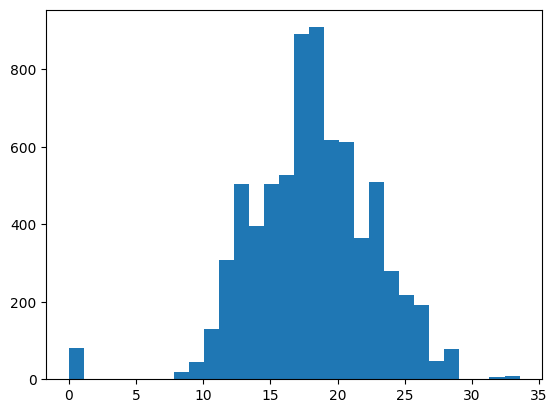

In [67]:
import matplotlib.pyplot as plt

plt.hist(df['Mileage'],bins=30)
plt.show()

결측치

In [27]:
import plotly.express as px
fig = px.scatter(df,x='Brand',y='Price')
fig.show()

In [28]:
df[df['Brand']=='Hindustan']

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id,Brand_Country,Brand_level
6216,Hindustan Motors Contessa 2.0 DSL,Pune,NaN,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,Hindustan,2.0,India,low


In [57]:
df[df['Engine'].isnull()][1]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id,Brand_Country,Brand_level
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,Honda,1.0,Japan,middle_low
208,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,Maruti,1.0,India,middle_low
733,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,Maruti,3.0,India,middle_low
749,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,Land,2.0,Europe,high
1294,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,Honda,1.0,Japan,middle_low
1327,Maruti Swift 1.3 ZXI,Hyderabad,8891.17,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,Maruti,1.0,India,middle_low
1385,Honda City 1.5 GXI,Pune,2299.44,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,Honda,2.0,Japan,middle_low
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,Land,1.0,Europe,high
2074,Maruti Swift 1.3 LXI,Pune,4828.82,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,Maruti,1.0,India,middle_low
2096,Hyundai Santro LP zipPlus,Coimbatore,2958.61,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,Hyundai,1.0,Korea,middle_low


In [58]:
df['Engine'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [73]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Brand                   0
Owner_Type_id           0
Brand_Country           0
Brand_level             0
dtype: int64

## Location

<Axes: xlabel='Location', ylabel='Price'>

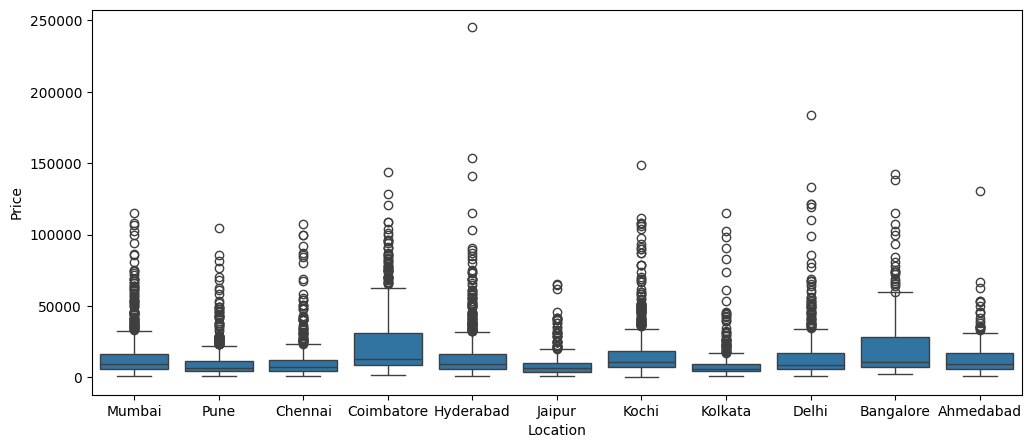

In [16]:
# Location별 Price
fig, axes = plt.subplots(figsize=(12,5))
sns.boxplot(data = df, y="Price", x="Location")

## Year
    - Age(연식) 변수 추가(2020년 기준)

<Axes: xlabel='Year', ylabel='Price'>

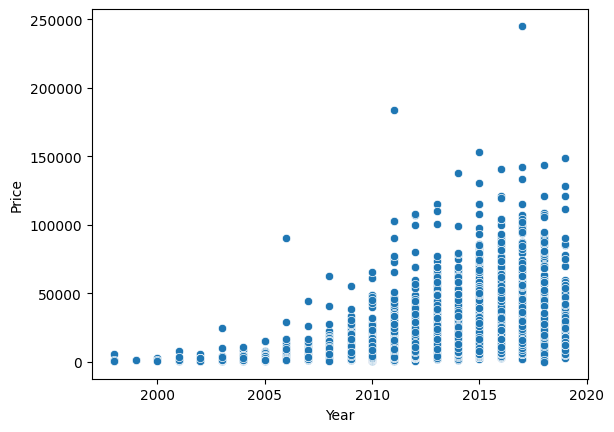

In [17]:
# year, Price scatter plot
sns.scatterplot(data=df, x="Year", y="Price")

In [18]:
# Age 추가
df['Age'] = 2020 - df['Year']
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id,Brand_Country,Brand_level,Age
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti,1.0,India,middle_low,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai,1.0,Korea,middle_low,5
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda,1.0,Japan,middle_low,9
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti,1.0,India,middle_low,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi,2.0,Europe,high,7


In [49]:
len(df[df['Seats']==0])

1

In [66]:
fuel = df['Fuel_Type'].copy()

In [ ]:
fuel

In [74]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id,Brand_Country,Brand_level
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti,1.0,India,middle_low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai,1.0,Korea,middle_low
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda,1.0,Japan,middle_low
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti,1.0,India,middle_low
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi,2.0,Europe,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,Volkswagen,1.0,Europe,middle_low
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,Volkswagen,1.0,Europe,middle_low
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,Nissan,1.0,Japan,middle_low
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,Volkswagen,3.0,Europe,middle_low


In [61]:
df[df['Mileage']==0]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id,Brand_Country,Brand_level
14,Land Rover Freelander 2 TD4 SE,Pune,26826.80,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,Land,2.0,Europe,high
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,54680.68,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,Mercedes-Benz,1.0,Europe,high
79,Hyundai Santro Xing XL,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,Hyundai,1.0,Korea,middle_low
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,Honda,1.0,Japan,middle_low
229,Ford Figo Diesel,Bangalore,5518.66,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,Ford,1.0,US,middle_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,NaN,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,Mahindra,1.0,India,middle_high
6697,Hyundai Santro Xing XL,Jaipur,NaN,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,Hyundai,2.0,Korea,middle_low
6857,Land Rover Freelander 2 TD4 SE,Mumbai,NaN,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,Land,1.0,Europe,high
6957,Honda Jazz 2020 Petrol,Kochi,NaN,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN,Honda,1.0,Japan,middle_low


In [32]:
x = pd.DataFrame(df.groupby(['Location','Brand'])['Brand'].count())
x

Brand
Location  Brand            
Ahmedabad Audi           13
          BMW            18
          Chevrolet       3
          Ford            6
          Honda          34
...                     ...
Pune      Smart           1
          Tata           43
          Toyota         61
          Volkswagen     44
          Volvo           2

[260 rows x 1 columns]

## 마일리지 결측치를 0으로 넣었어요 ><

In [82]:
df[df['Mileage'].isnull()].fillna(0)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Owner_Type_id,Brand_Country,Brand_level
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,Electric,Automatic,First,0.0,72.0,41.0,5.0,13.58 Lakh,Mahindra,1.0,India,middle_high
4904,Toyota Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,Electric,Automatic,First,0.0,1798.0,73.0,5.0,0,Toyota,1.0,Japan,middle_high


## 엔진이랑 마일리지 산점도를 그려봤어요 ~

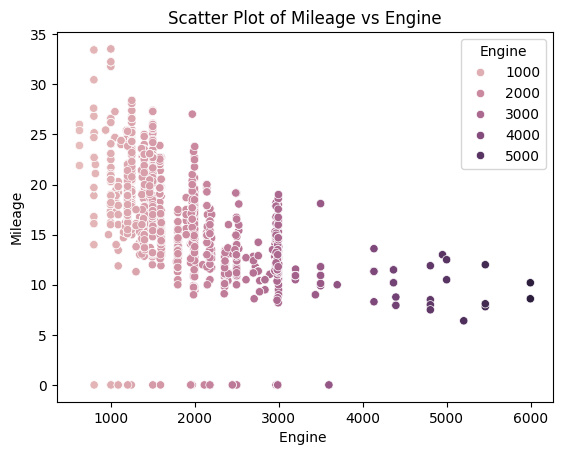

In [80]:

sns.scatterplot(x='Engine', y='Mileage', data=df, hue='Engine')

plt.title('Scatter Plot of Mileage vs Engine')
plt.xlabel('Engine ')
plt.ylabel('Mileage')

plt.legend(title='Engine')

plt.show()

''' 널을 0으로 바꿈
0인거 빼고 회귀식

0은 어차피 4000이하 걔네는 음의 상관관계 가짐 (산점도랑 히트맵보면 나옴)
그래서 얘네를 회귀 때려도 됨

밑에 박스플롯 보면 0은 휘발유랑 경유에만 존재
그래서 ㅎ뤼발유 경유 나눠서 각자 회귀때려
그래서 얘네는 상균이오빠한테 맞음
'''

# 연료랑 마일리지를 박스플롯을 그려봤어용

<Axes: xlabel='Fuel_Type', ylabel='Mileage'>

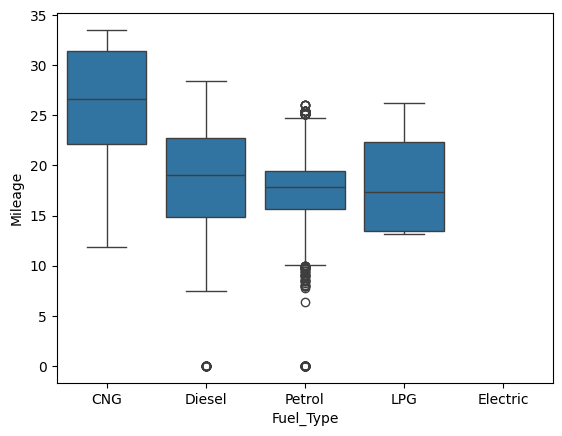

In [76]:
sns.boxplot(x='Fuel_Type', y='Mileage', data=df)